# MNIST Classification

\| [Danilo Toapanta]()  
2023-09-04

## 1 How to run locally

``` bash
$ pip install -r requirements.txt
```

## 2 Importing all libraries

In [65]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
np.random.seed(42)                          # This allows us to reproduce the results from our script
from keras.models import Sequential             
from keras.layers import Dense, Activation
from keras.optimizers import Adam, SGD
from keras.utils import to_categorical 

In [82]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print('Total no of Images: ',X_train.shape[0]) 
print('Size of Image:', X_train.shape[1:])
print('Total no of labels:', y_train.shape)

Total no of Images:  60000
Size of Image: (28, 28)
Total no of labels: (60000,)

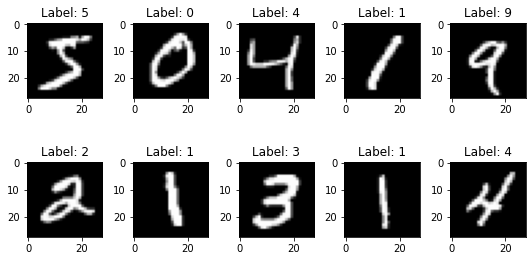

In [95]:
# Look input data
num = 10
num_row = 2
num_col = 5
images = X_train[:num]
labels = y_train[:num]

# Ploting images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

## 3 Prepare input data

In [68]:
X_train = X_train.reshape((X_train.shape[0],-1))
X_test = X_test.reshape((X_test.shape[0], -1))

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)

In [69]:
# Normalize data
X_train = X_train/255
X_test = X_test/255

# print(X_train[0])
X_train.shape

(60000, 784)

In [70]:
# Perfom one encoding

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train.shape)

(60000, 10)

In [71]:
num_classes = y_test.shape[1]
num_pixels = 784

## 4 Defining the model

In [72]:
# Define baseline model

def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(256, input_dim=num_pixels, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

In [73]:
# Build the model
model = baseline_model()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               200960    
                                                                 
 dense_7 (Dense)             (None, 64)                16448     
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 218058 (851.79 KB)
Trainable params: 218058 (851.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

In [74]:
opt = SGD(lr = 0.001)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

## 5 Train model

In [75]:
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6029 - accuracy: 0.8422
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2849 - accuracy: 0.9181
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2314 - accuracy: 0.9346
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1962 - accuracy: 0.9440
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1701 - accuracy: 0.9510

## 6 Test model

In [76]:
scores = model.evaluate(X_test, y_test, verbose=1)
print("Error: %.2f%%" % (100-scores[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.1672 - accuracy: 0.9516
Error: 4.84%

## 7 Predicting

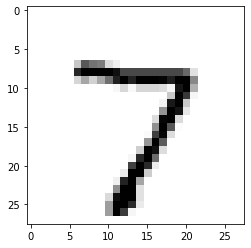

In [92]:
img_width, img_height = 28, 28
gray_image = X_test[0]
plt.imshow(gray_image,cmap='Greys')
plt.show()
# gray_image.shape
x = np.expand_dims(gray_image, axis=0)
x = x.reshape((1, -1))

In [94]:
preds = model.predict(x)
prob = np.argmax(preds, axis=1)

print('Predicted value is ', prob)
print('Probability across all numbers :', preds[0])

1/1 [==============================] - 0s 30ms/step
Predicted value is  [7]
Probability across all numbers : [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]